# **Proyek Sistem Rekomendasi Movie**

Nama     : Muhammad Sahrul

email    : m.sahrul59@gmail.com

github   : https://github.com/muhammadsahrul59

linkedin : https://www.linkedin.com/in/sahrul59

# **Project Overview**

Sistem rekomendasi adalah suatu system yang digunakan oleh para user / *customer* /pelanggan untuk mendapatkan produk yang diinginkan. Ide awal dari sistem rekomendasi sendiri adalah untuk menggunakan beberapa sumber informasi, tujuan utama dari sistem rekomendasi adalah untuk meningkatkan penjualan produk.Beberapa platform yang menyuguhkan film, seperti *Vidio*, *Netflix*, *WeTV*, *Viu*, *Disney+*, *Amazon Prime*, *HBO*, dan lainnya menerapkan sistem rekomendasi yang sama.

Proyek ini penting untuk diselesaikan karena sistem rekomendasi dapat memberikan nilai tambah yang signifikan bagi pengguna dan penyedia layanan. Bagi pengguna, sistem rekomendasi memungkinkan mereka menemukan konten yang sesuai dengan preferensi mereka tanpa perlu mencari secara manual, sehingga meningkatkan kepuasan dan pengalaman menonton. Bagi penyedia layanan, sistem rekomendasi dapat meningkatkan keterlibatan pengguna dan loyalitas pelanggan, yang pada akhirnya dapat meningkatkan pendapatan. Selain itu, dengan persaingan yang semakin ketat di industri streaming, memiliki sistem rekomendasi yang efektif dapat menjadi keunggulan kompetitif bisnis.

Mengembangkan sistem rekomendasi yang akurat dan relevan juga membantu dalam memahami tren dan perilaku pelanggan, yang dapat digunakan untuk strategi pemasaran yang lebih efektif dan pengembangan konten yang lebih tepat sasaran. Oleh karena itu, menyelesaikan proyek ini tidak hanya memberikan manfaat langsung kepada pengguna dan penyedia layanan, tetapi juga mendukung pertumbuhan dan inovasi dalam industri hiburan secara keseluruhan.

Referensi dari proyek ini adalah sebagai berikut:
1. *Movie Recommendation System Using Collaborative Filtering* [1]
2. *Movie Recommender System Using Content-based and Collaborative Filtering* [2]


## **Business Understanding**

### **Problem Statements**

Bagaimana cara merekomendasikan *movie* yang disukai pengguna lain dapat direkomendasikan kepada pengguna lainnya?

### **Goals**
Dapat membuat sistem rekomendasi yang akurat berdasarkan *ratings* dan aktivitas pengguna pada masa lalu.

### **Solution statements**
Solusi pembuatan model yang dilakukan adalah dengan menerapkan 2 algoritma *machine learning*, terbatas pada ***Content Based Filtering*** dan ***Collaborative Filtering***. Diterapkannya 2 algoritma tersebut sama-sama bertujuan untuk memberikan rekomendasi mengenai film kepada pengguna. Algoritma *content based filtering* akan merekomendasikan film kepada pengguna berdasarkan aktivitas film pengguna di masa lalu. Sedangkan, algoritma *collaborative filtering* akan merekomendasikan pengguna berdasarkan rating yang paling tinggi.

- ***Collaborative-filtering*** : Algoritma *Collaborative Filtering* menggunakan pendekatan model dari tingkah laku pengguna sebelumnya seperti kunjungan pengguna pada suatu alamat tayangan atau memberikan rating terhadap beberapa *item* pilihan pengguna dan juga yang dilakukan oleh pengguna lain yang nantinya *item* tersebut akan dijadikan acuan untuk memberikan prediksi terhadap pengguna lain atau pengguna yang berkaitan.

- ***Content-based filtering*** : Algoritma *Content Based Filtering* melakukan pedekatan melalui pendekatan diskrit sesuai dengan item yang memiliki kedekatan dalam tipikal *item*, pendekatan ini melakukan pengambilan data dari suatu item yang memiliki karakterisitik yang berdekatan.

# **Data Understanding**

Data atau dataset yang digunakan pada proyek machine learning ini adalah data ***Movie Recommendation Data*** yang didapat dari situs *kaggle* [3].

Variabel-variabel pada *movie recommendation data* adalah sebagai berikut :

1. *links* : merupakan daftar tautan movie.
2. *movies* : merupakan daftar *movie* yang tersedia
3. *ratings* : merupakan daftar penilaian yang diberikan pengguna terhadap *movie*.
4. *tags* : merupakan daftar kata kunci dari *movie* tersebut

Menginstal *library* *Kaggle* yang diperlukan untuk mengunduh dataset dari *Kaggle*

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahrul59","key":"a2a0b57736f84e06bf56dc1d47197e48"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Mengunduh dataset dari *Kaggle* menggunakan API token yang telah diunggah dan disimpan di '*kaggle.json*'

In [3]:
!kaggle datasets download -d rohan4050/movie-recommendation-data

Dataset URL: https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data
License(s): unknown
 68% 9.00M/13.1M [00:00<00:00, 76.7MB/s]
100% 13.1M/13.1M [00:00<00:00, 94.8MB/s]


Lakukan unzip file dengan menerapkan kode berikut.

In [4]:
!unzip /content/movie-recommendation-data.zip

Archive:  /content/movie-recommendation-data.zip
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/movies.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: movies_metadata.csv     


Selanjutnya, baca data-data di atas dengan menggunakan fungsi pandas.read_csv. Implementasikan kode berikut.

In [8]:
import pandas as pd

movies_df = pd.read_csv('/content/ml-latest-small/movies.csv')
ratings_df = pd.read_csv('/content/ml-latest-small/ratings.csv')
links_df = pd.read_csv('/content/ml-latest-small/links.csv')
tags_df = pd.read_csv('/content/ml-latest-small/tags.csv')


print('Jumlah data movie: ', len(movies_df.movieId.unique()))
print('Jumlah data tags movie: ', len(tags_df.movieId.unique()))
print('Jumlah data link movie : ', len(links_df.movieId.unique()))
print('Jumlah data ratings dari pengguna : ', len(ratings_df.userId.unique()))
print('Jumlah data ratings dari movie : ', len(ratings_df.movieId.unique()))

Jumlah data movie:  9742
Jumlah data tags movie:  1572
Jumlah data link movie :  9742
Jumlah data ratings dari pengguna :  610
Jumlah data ratings dari movie :  9724


# **Explanatory Data Analysis**

## **Univariate Data Analysis**

### **Movies Variable**

Eksplorasi variabel *movies*, yaitu daftar *movie* yang mana terdapat informasi mengenai *movieId*, *title*, dan *genres* dari *movie*.

In [9]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


`info()` digunakan untuk mengetahui informasi terkait tipe data dan *non-null* data pada *dataset movies*.

In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


`isna()` dilakukan untuk mengetahui apakah ada *missing value* pada *dataset movies*.

In [11]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
movies_df.shape

(9742, 3)

*Dataset movies* memiliki banyak data **10,329** ***sample*** dengan **3 fitur**

In [13]:
print('Banyak data: ', len(movies_df.movieId.unique()))
print('Judul movies yang ada: ', movies_df.title.unique())

Banyak data:  9742
Judul movies yang ada:  ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'Flint (2017)' 'Bungo Stray Dogs: Dead Apple (2018)'
 'Andrew Dice Clay: Dice Rules (1991)']


### **Links Variable**

Eksplorasi variabel *links*, yaitu daftar *link movie*.

`info()` digunakan untuk mengetahui informasi terkait tipe data dan *non-null* data pada *dataset links*.

In [19]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


### **Ratings Variable**

Eksplorasi variabel *ratings* data yang akan digunakan pada model yaitu data *rating* (data pengguna).

In [14]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


`info()` digunakan untuk mengetahui informasi terkait tipe data dan *non-null* data pada *dataset ratings*.

In [15]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


`describe()` digunakan untuk mengetahui informasi terkait *mean*, *std*, *min*, *quartil*, dan *max*.

Dari tabel yang didapatkan, dapat diketahui bahwa dataset rating, memiliki minimum rating 0.5 dan maksimum rating 5 yang dapat diberikan oleh pengguna.

In [16]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [17]:
print('Jumlah userID: ', len(ratings_df.userId.unique()))
print('Jumlah placeID: ', len(ratings_df.movieId.unique()))
print('Jumlah data rating: ', len(ratings_df))

Jumlah userID:  610
Jumlah placeID:  9724
Jumlah data rating:  100836


`isna()` dilakukan untuk mengetahui apakah ada *missing value* pada *dataset ratings*.

In [18]:
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

# **Data Preprocessing**

## **Menggabungkan Movie**

Menggunakan *library numpy* dan fungsi *concatenate()* untuk menggabungkan beberapa *file*. Setelah itu menggunakan movieId yang unik sebagai acuan dalam penggabungan.

In [20]:
import numpy as np

# Menggabungkan seluruh item_id pada kategori Movie
movie_all = np.concatenate((movies_df.movieId.unique(),
                            ratings_df.movieId.unique(),
                            links_df.movieId.unique(),
                            tags_df.movieId.unique()))

movie_all = np.sort(np.unique(movie_all))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieId:  9742


## **Menghubungkan Seluruh User**

Terapkan cara yang sama pada kategori *variabel User*. Dengan fungsi `concatenate()` dari *library numpy*, gabungkan seluruh data pada kategori *variabel User*.

In [21]:
# Menggabungkan seluruh userID
user_all = np.concatenate((ratings_df.userId.unique(),
                           tags_df.userId.unique()))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


## **Mengetahui Jumlah Rating**

Menggabungkan ***links_df***, ***movies_df***, ***ratings_df***, dan ***tags_df*** ke dalam *dataframe movie_info*. Serta menggabungkan *dataframe ratings* dengan *movie_info* berdasarkan nilai *movieId*

In [22]:
# Menggabungkan file rating, dan movies ke dalam dataframe movie_info
movie_info = pd.concat([movies_df, ratings_df, tags_df, links_df])

# Menggabungkan dataframe rating dengan movie_info berdasarkan nilai item_id
movie = pd.merge(ratings_df, movie_info , on='movieId', how='left')
movie

,userId_x,movieId,rating_x,timestamp_x,title,genres,userId_y,rating_y,timestamp_y,tag,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,1.0,4.0,9.649827e+08,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,5.0,4.0,8.474350e+08,NaN,NaN,NaN
3,1,1,4.0,964982703,NaN,NaN,7.0,4.5,1.106636e+09,NaN,NaN,NaN
4,1,1,4.0,964982703,NaN,NaN,15.0,2.5,1.510578e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6359580,610,170875,3.0,1493846415,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN,NaN,NaN,NaN
6359581,610,170875,3.0,1493846415,NaN,NaN,50.0,1.0,1.514498e+09,NaN,NaN,NaN
6359582,610,170875,3.0,1493846415,NaN,NaN,249.0,3.0,1.505165e+09,NaN,NaN,NaN
6359583,610,170875,3.0,1493846415,NaN,NaN,610.0,3.0,1.493846e+09,NaN,NaN,NaN


Hasil jumlah *rating* diatas terdapat banyak sekali *missing value* maka selanjutnya lakukan cek missing value.

In [23]:
movie.isnull().sum()

userId_x             0
movieId              0
rating_x             0
timestamp_x          0
title          6258749
genres         6258749
userId_y        201672
rating_y        434885
timestamp_y     201672
tag            6126372
imdbId         6258749
tmdbId         6258762
dtype: int64

Terdapat banyak missing value pada sebagian besar fitur. Hanya fitur userID_x, movieId, rating_x, dan timestamp_x saja yang memiliki 0 missing value. Selanjutnya, menggabungkan rating berdasarkan movieId

In [24]:
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,title,genres,userId_y,rating_y,timestamp_y,tag,imdbId,tmdbId
movieId,,,,,,,,,,,
1,14498880,185460.0,53441180205380,Toy Story (1995)Toy Story (1995)Toy Story (199...,Adventure|Animation|Children|Comedy|FantasyAdv...,14465415.0,181245.0,5.304394e+13,pixarpixarfunpixarpixarfunpixarpixarfunpixarpi...,24662435.0,185330.0
2,4205116,43790.0,14492875665352,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,Adventure|Children|FantasyAdventure|Children|F...,4060210.0,41525.0,1.437287e+13,fantasymagic board gameRobin Williamsgamefanta...,12484670.0,972840.0
3,825832,9492.0,2926881125616,Grumpier Old Men (1995)Grumpier Old Men (1995)...,Comedy|RomanceComedy|RomanceComedy|RomanceCome...,796900.0,8814.0,2.836734e+12,moldyoldmoldyoldmoldyoldmoldyoldmoldyoldmoldyo...,5887856.0,811304.0
4,13851,148.5,56610468432,Waiting to Exhale (1995)Waiting to Exhale (199...,Comedy|Drama|RomanceComedy|Drama|RomanceComedy...,10773.0,115.5,4.403036e+10,0,804195.0,219499.0
5,777987,7976.5,2577949287482,Father of the Bride Part II (1995)Father of th...,ComedyComedyComedyComedyComedyComedyComedyCome...,765723.0,7374.5,2.494850e+12,pregnancyremakepregnancyremakepregnancyremakep...,5539009.0,581238.0
...,...,...,...,...,...,...,...,...,...,...,...
193581,552,12.0,4611327246,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,0,5476944.0,432131.0
193583,552,10.5,4611328635,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,0,5914996.0,445030.0
193585,552,10.5,4611329415,Flint (2017),Drama,184.0,3.5,1.537110e+09,0,6397426.0,479308.0


## **Menggabungkan Data dengan Fitur Nama Movie**

Pertama, definisikan variabel *all_movie_rate* dengan variabel *rating_df* yang telah kita ketahui sebelumnya.

In [26]:
# Definisikan dataframe rating ke dalam variabel all_movie_rate
all_movie_rate = ratings_df
all_movie_rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Selanjutnya, untuk mengetahui nama *movie* dengan *movieId* tertentu, gabungkan data *movies_df* yang berisikan *movieId*, *title*, dan *genres* berdasarkan *movieId* dan assign ke variabel *all_movie_name* dengan fungsi merge dari *library pandas*.

In [27]:
# Menggabungkan all_movie_name dengan dataframe geo berdasarkan movieId
all_movie_name = pd.merge(all_movie_rate, movies_df[['movieId','title','genres']], on='movieId', how='left')

# Print dataframe all_movie_name
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


Menggabungkan *variabel* *all_movie_name* yang diperoleh dari tahapan sebelumnya dengan fitur *movieId* dan *tag*.

In [28]:
# Menggabungkan dataframe genres dengan all_movie_name dan memasukkannya ke dalam variabel all_movie
all_movie = pd.merge(all_movie_name, tags_df[['movieId','tag']], on='movieId', how='left')

# Print dataframe all_movie
all_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


# **Data Preparation**

## **Menangani Missing Value**

Setelah proses penggabungan. Mengecek datanya apakah ada *missing value* atau tidak.

In [29]:
# Mengecek missing value pada dataframe all_movie
all_movie.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
tag          52549
dtype: int64

Terdapat 52549 *missing value* pada fitur *tag*, kemudian menghapus *missing value* dengan fungsi `dropna()`

In [31]:
# Membersihkan missing value dengan fungsi dropna()
all_movie_clean = all_movie.dropna()
all_movie_clean

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking


Setelah menghapus missing value, maka data yang sebelumnya memiliki 285762 baris sekarang memiliki 233213 baris. Cek kembali missing value pada variabel all_movie_clean

In [33]:
# Mengecek kembali missing value pada variabel all_movie_clean
all_movie_clean.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64

## **Menyamakan Movie berdasarkan movieId**

Mengurutkan *movie* berdasarkan *movieId* kemudian memasukkannya ke dalam variabel *fix_movie*

In [34]:
# Mengurutkan movie berdasarkan movieId kemudian memasukkannya ke dalam variabel fix_movie
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,1464196374,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


Mengetahui berapa jumlah fix_movie.

In [36]:
# Mengecek berapa jumlah fix_movie
len(fix_movie.movieId.unique())

1554

Membuat variabel *preparation* yang berisi *dataframe fix_movie* kemudian mengurutkan berdasarkan *movieId*.

In [37]:
# Membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,1005966797,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
191470,414,187595,3.5,1527977920,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


Selanjutnya, gunakan data unik untuk dimasukkan ke dalam proses pemodelan. serta hapus data *duplicate* dengan fungsi `drop_duplicates()` berdasarkan *movieId*.

In [38]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,849122858,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,840306238,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27632,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,1536872748,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,1532457913,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


Kemudian, melakukan konversi data series menjadi *list*. Dalam hal ini, menggunakan fungsi `tolist()` dari *library numpy*.



In [39]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

1554
1554
1554


Membuat *dictionary* untuk menentukan pasangan *key-value* pada data *movie_id*, *movie_name*, dan *movie_genre* yang telah disiapkan sebelumnya.

In [40]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})

movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


# **Model Development dengan Content Based Filtering**

Mengecek data dan *assign dataframe* dari tahap sebelumnya ke dalam variabel data, sebagai berikut:

In [41]:
data = movie_new
data.sample(5)

,id,movie_name,genre
286,1193,One Flew Over the Cuckoo's Nest (1975),Drama
1513,134170,Kung Fury (2015),Action|Comedy|Fantasy|Sci-Fi
601,2710,"Blair Witch Project, The (1999)",Drama|Horror|Thriller
1321,37741,Capote (2005),Crime|Drama
424,1682,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi


## **TF-IDF Vectorizer**

Teknik *TF-IDF Vectorizer* dapat digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori *movie*. Pada proyek ini, menggunakan fungsi `tfidfvectorizer()` dari *library sklearn*

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [43]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1554, 24)

*Matriks* berukuran (1554, 24). Nilai 1554 merupakan ukuran data dan 24 merupakan matrik kategori *genre*.

Untuk menghasilkan *vektor tf-idf* dalam bentuk *matriks*, menggunakan fungsi `todense()`.

In [44]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

Selanjutnya, *matriks tf-idf* untuk beberapa nama *movie* dan *genre*.

In [46]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan nama movie

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.movie_name
).sample(22, axis=1).sample(10, axis=0)

,animation,fi,noir,musical,western,children,no,film,adventure,imax,...,horror,genres,crime,fantasy,listed,mystery,action,romance,sci,documentary
movie_name,,,,,,,,,,,,,,,,,,,,,
Hoosiers (a.k.a. Best Shot) (1986),0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.846843,0.000000,0.0
Thor: Ragnarok (2017),0.0,0.526659,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.478552,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.465025,0.000000,0.526659,0.0
Signs (2002),0.0,0.497101,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.583893,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.497101,0.0
"Ox-Bow Incident, The (1943)",0.0,0.000000,0.000000,0.000000,0.955208,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
"Hello, Dolly! (1969)",0.0,0.000000,0.000000,0.766379,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.492697,0.000000,0.0
Matchstick Men (2003),0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.755120,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
"Lost Weekend, The (1945)",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
Top Hat (1935),0.0,0.000000,0.000000,0.766379,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.492697,0.000000,0.0
"Man Who Wasn't There, The (2001)",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.886777,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


## **Cosine Similarity**

***Cosine Similarity*** menghitung derajat kesamaan (*similarity degree*) antar movie dengan teknik *cosine similarity*.

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

Membuat dataframe dari variabel *cosine_sim_df* dengan baris dan kolom berupa nama *movie*, serta melihat kesamaan *matrix* dari setiap *movie*.

In [48]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama movie
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['movie_name'], columns=data['movie_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap movie
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,Europa Europa (Hitlerjunge Salomon) (1990),Airplane! (1980),Hello Again (1987),Pillow Talk (1959),"Wings of the Dove, The (1997)"
movie_name,,,,,
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),0.000000,0.359833,0.359833,0.148325,0.000000
Kingdom of Heaven (2005),0.747509,0.000000,0.000000,0.214871,0.514984
America's Sweethearts (2001),0.000000,0.641674,0.641674,0.642388,0.649510
"Conversation, The (1974)",0.151750,0.000000,0.000000,0.000000,0.220268
"Salo, or The 120 Days of Sodom (Salò o le 120 giornate di Sodoma) (1976)",0.366404,0.000000,0.000000,0.000000,0.531842
Aliens (1986),0.000000,0.000000,0.000000,0.000000,0.000000
A Pigeon Sat on a Branch Reflecting on Existence (2014),0.219968,0.799743,0.799743,0.329657,0.319287
Personal Velocity (2002),0.366404,0.000000,0.000000,0.000000,0.531842
Whale Rider (2002),0.366404,0.000000,0.000000,0.000000,0.531842


## **Mendapatkan Rekomendasi**

Membuat fungsi *movie_recommendations* dengan beberapa parameter sebagai berikut:

- *Nama_movie* : Nama judul dari movie tersebut (*index* kemiripan *dataframe*).
- *Similarity_data* : *Dataframe* mengenai *similarity* yang telah didefinisikan sebelumnya
- *Items* : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah *‘movie_name’* dan *‘genre’*.
- *k* : Banyak rekomendasi yang ingin diberikan.

In [49]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=data[['movie_name', 'genre']], k=5):
    """
    Rekomendasi Movie berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_movie : tipe data string (str)
                Nama judul dari movie tersebut (index kemiripan dataframe).
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan movie sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Terapkan kode di atas untuk menemukan rekomendasi movie yang mirip dengan Thor: Ragnarok (2017).

In [51]:
data[data.movie_name.eq('Thor: Ragnarok (2017)')]

,id,movie_name,genre
1505,122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi


Hasil di atas dapat dilihat bahwa pengguna menyukai *movie* yang berjudul *Thor: Ragnarok (2017)* yang bergenre *Action*, *Adventure*, dan *Sci-Fi*.
Mendapatkan rekomendasi movie yang mirip dengan *Thor: Ragnarok (2017*).

In [52]:
# Mendapatkan rekomendasi movie yang mirip dengan Thor: Ragnarok (2017)
movie_recommendations('Thor: Ragnarok (2017)')


,movie_name,genre
0,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
1,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi
2,Fantastic Four (2005),Action|Adventure|Sci-Fi
3,Serenity (2005),Action|Adventure|Sci-Fi
4,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


# **Model Development dengan Collaborative Filtering**

## **Data Understanding**

*Import library* yang dibutuhkan

In [53]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Ubah nama *variabel ratings* yang telah dibuat menjadi *df*.

In [54]:
# Membaca dataset

df = ratings_df
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## **Data Preparation**

Melakukan persiapan data untuk menyandikan (*encode*) fitur *‘user’* dan *‘movieId’* ke dalam *indeks integer*. Terapkan kode berikut.

In [55]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [56]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

# Selanjutnya, petakan userId dan movieId ke dataframe yang berkaitan.

# Mapping userId ke dataframe genres
df['genres'] = df['userId'].map(user_to_user_encoded)

# Mapping movieD ke dataframe movies
df['movies'] = df['movieId'].map(movie_to_movie_encoded)

In [57]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# Mengubah rating menjadi nilai float
df['ratings'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])


# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(num_users, num_movie, min_rating, max_rating))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


## **Membagi Data untuk Training dan Validasi**

In [58]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
67037,432,77866,4.5,1335139641,431,4730,4.5
42175,288,474,3.0,978465565,287,474,3.0
93850,599,4351,3.0,1498524542,598,2631,3.0
6187,42,2987,4.0,996262677,41,194,4.0
12229,75,1610,4.0,1158989841,74,727,4.0
...,...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873,4.0
54886,364,141,4.0,869443367,363,524,4.0
76820,480,6867,4.0,1179163171,479,2240,4.0
860,6,981,3.0,845556567,5,712,3.0


In [59]:
# membagi data train dan validasi dengan komposisi 80:20.
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['genres', 'movies']].values

# Membuat variabel y untuk membuat ratings dari hasil
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


## **Data Training**

Membuat *class* *RecommenderNet* dengan keras *Model class*.

In [60]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Selanjutnya, lakukan proses *compile* terhadap `model`.

In [62]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

menggunakan *Binary Crossentropy* untuk menghitung *loss function*, Adam (*Adaptive Moment Estimation*) sebagai *optimizer*, *dan root mean squared error* (RMSE) sebagai *metrics evaluation*.

Langkah berikutnya, mulailah proses training.

In [63]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 150,
    validation_data = (x_val, y_val)
)

Epoch 1/150
1261/1261 [==============================] - 15s 11ms/step - loss: 0.6387 - root_mean_squared_error: 0.2348 - val_loss: 0.6207 - val_root_mean_squared_error: 0.2152
Epoch 2/150
1261/1261 [==============================] - 11s 9ms/step - loss: 0.6144 - root_mean_squared_error: 0.2094 - val_loss: 0.6205 - val_root_mean_squared_error: 0.2144
Epoch 3/150
1261/1261 [==============================] - 10s 8ms/step - loss: 0.6089 - root_mean_squared_error: 0.2035 - val_loss: 0.6133 - val_root_mean_squared_error: 0.2069
Epoch 4/150
1261/1261 [==============================] - 11s 9ms/step - loss: 0.6065 - root_mean_squared_error: 0.2008 - val_loss: 0.6132 - val_root_mean_squared_error: 0.2068
Epoch 5/150
1261/1261 [==============================] - 12s 9ms/step - loss: 0.6063 - root_mean_squared_error: 0.2003 - val_loss: 0.6128 - val_root_mean_squared_error: 0.2063
Epoch 6/150
1261/1261 [==============================] - 11s 9ms/step - loss: 0.6066 - root_mean_squared_error: 0.2003 

## **Model Evaluasi**

Untuk melihat visualisasi proses training, buat plot metrik evaluasi dengan matplotlib.

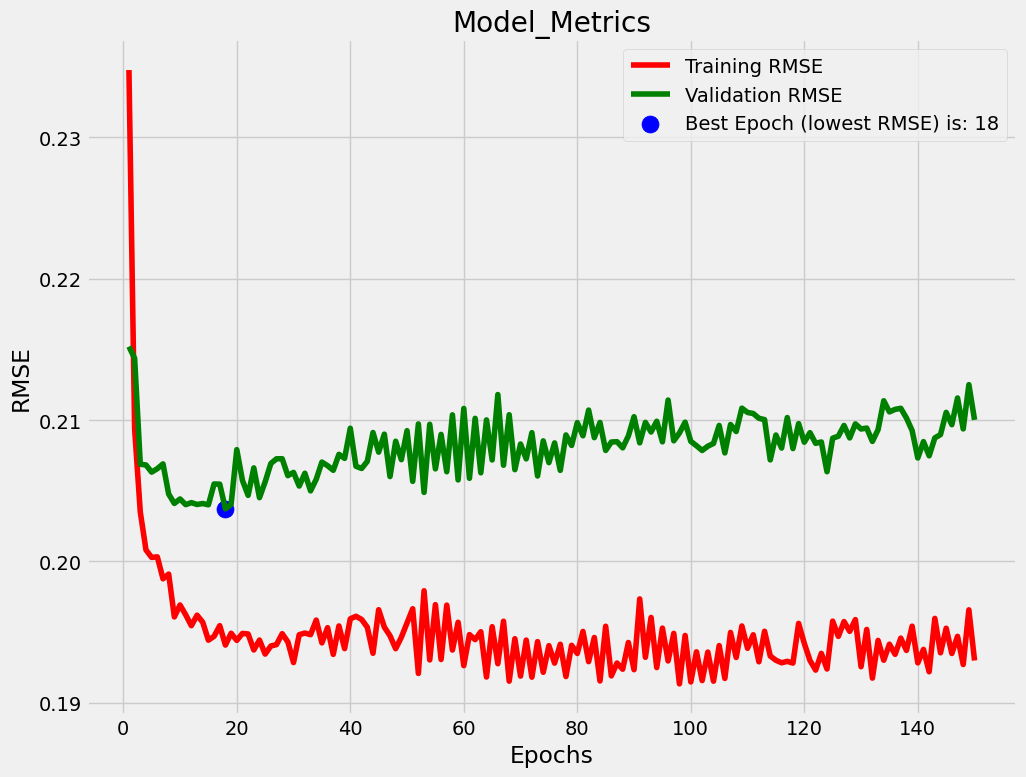

In [70]:
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

index_rmse_min = np.argmin(val_rmse)
index_rmse_max = np.argmax(val_rmse)

val_rmse_lowest = val_rmse[index_rmse_min]
val_rmse_highest = val_rmse[index_rmse_max]

epochs = [i + 1 for i in range(len(train_rmse))]
rmse_min_label = f"Best Epoch (lowest RMSE) is: {str(index_rmse_min + 1)}"
rmse_max_label = f"Best Epoch (highest RMSE) is: {str(index_rmse_max + 1)}"

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs, train_rmse, 'r', label="Training RMSE")
plt.plot(epochs, val_rmse, 'g', label="Validation RMSE")
plt.scatter(index_rmse_min + 1, val_rmse_lowest, s=150, c='blue', label=rmse_min_label)
plt.title('Model_Metrics')
plt.xlabel("Epochs")
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

Visualisasi diatas merupakan proses *training model* yang cukup *smooth* dan *model* *konvergen* pada *epochs* sekitar 150. Dari proses ini, memperoleh nilai *error* akhir sebesar sekitar 0.19 dan error pada data validasi sebesar 0.21.

## **Mendapatkan Rekomendasi Movie**

In [71]:
movie_df = movie_new
df = pd.read_csv('/content/ml-latest-small/ratings.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys())))

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched))

Untuk mendapatkan rekomendasi *movies*, gunakan fungsi `model.predict()` dari *library Keras* dengan menerapkan kode berikut.

In [72]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

23/23 [==============================] - 1s 4ms/step
Showing recommendations for users: 414
movie with high ratings from user
--------------------------------
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) : Comedy|War
2001: A Space Odyssey (1968) : Adventure|Drama|Sci-Fi
It's a Wonderful Life (1946) : Children|Drama|Fantasy|Romance
Great Escape, The (1963) : Action|Adventure|Drama|War
Princess and the Warrior, The (Krieger und die Kaiserin, Der) (2000) : Drama|Romance
--------------------------------
Top 10 movie recommendation
--------------------------------
More (1998) : Animation|Drama|Sci-Fi|IMAX
Crossing Delancey (1988) : Comedy|Romance
Lady Jane (1986) : Drama|Romance
Awful Truth, The (1937) : Comedy|Romance
Come and See (Idi i smotri) (1985) : Drama|War
Adam's Rib (1949) : Comedy|Romance
Safety Last! (1923) : Action|Comedy|Romance
Into the Woods (1991) : Adventure|Comedy|Fantasy|Musical
Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990) : Come

Dari hasi di atas movie yang bergenre drama menjadi movie yang paling tinggi ratingsnya. Kemudian top 10 movie yang direkomendasikan sistem adalah movie dengan genre comedy dan romance.

Referensi :

[1] C.-S. M. Wu, D. Garg, and U. Bhandary, “Movie Recommendation System Using Collaborative Filtering,” IEEE Xplore, Nov. 01, 2018. https://ieeexplore.ieee.org/abstract/document/8663822

[2] J. F. Mohammad and S. Urolagin, “Movie Recommender System Using Content-based and Collaborative Filtering,” IEEE Xplore, May 01, 2022. https://ieeexplore.ieee.org/document/9872515

[3] “Movie Recommendation Data,” www.kaggle.com. https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data (accessed Jun. 07, 2024).